## Audio Features Meaning:

**acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

**instrumentalness**: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

**liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words

**valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [1]:
"""!pip install plotly==2.7.0
!pip install xgboost
!pip install shap
!pip install lightgbm"""

'!pip install plotly==2.7.0\n!pip install xgboost\n!pip install shap\n!pip install lightgbm'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier

import sklearn.metrics as mt

import shap

In [3]:
kpopgroups= pd.read_csv("kpop_groups.csv")
df = kpopgroups.copy()
df

Unnamed: 0  danceability  energy  key  speechiness  acousticness  \
0              0         0.566   0.716    1       0.0424       0.00691   
1              1         0.764   0.526   11       0.2120       0.04840   
2              2         0.547   0.605    8       0.0415       0.42000   
3              3         0.703   0.321    4       0.8840       0.86400   
4              4         0.787   0.669    5       0.0428       0.00782   
...          ...           ...     ...  ...          ...           ...   
5979        5979         0.745   0.951    5       0.0527       0.04280   
5980        5980         0.790   0.853   11       0.0665       0.00116   
5981        5981         0.745   0.951    5       0.0527       0.04280   
5982        5982         0.790   0.853   11       0.0666       0.00116   
5983        5983         0.745   0.951    5       0.0527       0.04280   

      instrumentalness  liveness  valence    tempo  loudness  mode  \
0             0.000000    0.3700    0.450   81.068    -5.733     1   
1             0.000000    0.0718    0.588  114.910    -7.355     1   
2             0.000000    0.1250    0.364  121.953    -6.755     1   
3             0.000000    0.9080    0.544  114.822   -13.135     1   
4             0.000000    0.1230    0.570  104.994    -4.333     0   
...                ...       ...      ...      ...       ...   ...   
5979          0.003860    0.2030    0.606  127.945    -2.425     1   
5980          0.000042    0.3290    0.713  124.998    -4.564     0   
5981          0.003860    0.2030    0.606  127.957    -2.425     1   
5982          0.000042    0.3290    0.713  125.000    -4.564     0   
5983          0.003860    0.2030    0.606  127.945    -2.425     1   

      duration_ms  time_signature artist_name release_date  \
0          207481               4         BTS   2020-11-20   
1          222243               4         BTS   2020-11-20   
2          254950               4         BTS   2020-11-20   
3          179548               4         BTS   2020-11-20   
4          202313               4         BTS   2020-11-20   
...           ...             ...         ...          ...   
5979       200303               4        ITZY   2019-02-14   
5980       199874               4        ITZY   2019-02-12   
5981       200303               4        ITZY   2019-02-12   
5982       199874               4        ITZY   2019-02-12   
5983       200303               4        ITZY   2019-02-12   

               song_name song_name_formatted  
0           Life Goes On        life-goes-on  
1         Fly To My Room      fly-to-my-room  
2            Blue & Grey           blue-grey  
3                   Skit                skit  
4              Telepathy           telepathy  
...                  ...                 ...  
5979            WANT IT?                want  
5980  달라달라 (DALLA DALLA)                 NaN  
5981            WANT IT?                want  
5982  달라달라 (DALLA DALLA)                 NaN  
5983            WANT IT?                want  

[5984 rows x 18 columns]

In [4]:
df = df.drop(columns=["Unnamed: 0"])
df

danceability  energy  key  speechiness  acousticness  instrumentalness  \
0            0.566   0.716    1       0.0424       0.00691          0.000000   
1            0.764   0.526   11       0.2120       0.04840          0.000000   
2            0.547   0.605    8       0.0415       0.42000          0.000000   
3            0.703   0.321    4       0.8840       0.86400          0.000000   
4            0.787   0.669    5       0.0428       0.00782          0.000000   
...            ...     ...  ...          ...           ...               ...   
5979         0.745   0.951    5       0.0527       0.04280          0.003860   
5980         0.790   0.853   11       0.0665       0.00116          0.000042   
5981         0.745   0.951    5       0.0527       0.04280          0.003860   
5982         0.790   0.853   11       0.0666       0.00116          0.000042   
5983         0.745   0.951    5       0.0527       0.04280          0.003860   

      liveness  valence    tempo  loudness  mode  duration_ms  time_signature  \
0       0.3700    0.450   81.068    -5.733     1       207481               4   
1       0.0718    0.588  114.910    -7.355     1       222243               4   
2       0.1250    0.364  121.953    -6.755     1       254950               4   
3       0.9080    0.544  114.822   -13.135     1       179548               4   
4       0.1230    0.570  104.994    -4.333     0       202313               4   
...        ...      ...      ...       ...   ...          ...             ...   
5979    0.2030    0.606  127.945    -2.425     1       200303               4   
5980    0.3290    0.713  124.998    -4.564     0       199874               4   
5981    0.2030    0.606  127.957    -2.425     1       200303               4   
5982    0.3290    0.713  125.000    -4.564     0       199874               4   
5983    0.2030    0.606  127.945    -2.425     1       200303               4   

     artist_name release_date           song_name song_name_formatted  
0            BTS   2020-11-20        Life Goes On        life-goes-on  
1            BTS   2020-11-20      Fly To My Room      fly-to-my-room  
2            BTS   2020-11-20         Blue & Grey           blue-grey  
3            BTS   2020-11-20                Skit                skit  
4            BTS   2020-11-20           Telepathy           telepathy  
...          ...          ...                 ...                 ...  
5979        ITZY   2019-02-14            WANT IT?                want  
5980        ITZY   2019-02-12  달라달라 (DALLA DALLA)                 NaN  
5981        ITZY   2019-02-12            WANT IT?                want  
5982        ITZY   2019-02-12  달라달라 (DALLA DALLA)                 NaN  
5983        ITZY   2019-02-12            WANT IT?                want  

[5984 rows x 17 columns]

In [5]:
year = df["release_date"].apply(lambda x: x.split('-')[0])
df.insert(15,"year",year)

In [6]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['artist_name'] = [i.lower().replace("'", '') for i in df.artist_name]

In [7]:
df.describe().T

count           mean           std           min  \
danceability      5984.0       0.653703      0.123452      0.000000   
energy            5984.0       0.759343      0.161465      0.002770   
key               5984.0       5.380515      3.543256      0.000000   
speechiness       5984.0       0.096219      0.089620      0.000000   
acousticness      5984.0       0.180083      0.215273      0.000005   
instrumentalness  5984.0       0.042525      0.177240      0.000000   
liveness          5984.0       0.225994      0.200193      0.010800   
valence           5984.0       0.550064      0.207912      0.000000   
tempo             5984.0     121.608275     25.732910      0.000000   
loudness          5984.0      -4.741049      2.302029    -27.191000   
mode              5984.0       0.569686      0.495161      0.000000   
duration_ms       5984.0  209547.997828  38231.198723  12640.000000   
time_signature    5984.0       3.970588      0.232286      0.000000   

                            25%          50%            75%         max  
danceability           0.582000       0.6690       0.739000       0.958  
energy                 0.681750       0.8030       0.876000       0.995  
key                    2.000000       6.0000       8.000000      11.000  
speechiness            0.043200       0.0662       0.113000       0.936  
acousticness           0.027475       0.0933       0.244250       0.995  
instrumentalness       0.000000       0.0000       0.000002       0.965  
liveness               0.094175       0.1440       0.306000       0.980  
valence                0.390000       0.5590       0.710250       0.978  
tempo                102.728000     120.0715     136.072750     216.146  
loudness              -5.527000      -4.4100      -3.278500       0.039  
mode                   0.000000       1.0000       1.000000       1.000  
duration_ms       192568.750000  209875.0000  228293.250000  588120.000  
time_signature         4.000000       4.0000       4.000000       5.000

In [8]:
df.columns

Index(['danceability', 'energy', 'key', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'loudness', 'mode',
       'duration_ms', 'time_signature', 'artist_name', 'release_date', 'year',
       'song_name', 'song_name_formatted'],
      dtype='object')

In [9]:
df.isnull().sum()

danceability             0
energy                   0
key                      0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
loudness                 0
mode                     0
duration_ms              0
time_signature           0
artist_name              0
release_date             0
year                     0
song_name                0
song_name_formatted    675
dtype: int64

In [10]:
df.artist_name.value_counts()

bts                 994
blackpink           502
winner              500
girls generation    494
exo                 418
twice               410
nct 127             369
got7                360
red velvet          300
stray kids          273
gfriend             270
monsta x            265
mamamoo             236
exid                187
astro               163
itzy                155
everglow             51
wanna one            37
Name: artist_name, dtype: int64

In [11]:
key_mapping = {0: 'C', 1: 'C♯,D♭', 2: 'D', 3: 'D♯,E♭', 4: 'E', 5: 'F', 6: 'F♯,G♭', 7: 'G', 8: 'G♯,A♭', 9: 'A', 10: 'A♯,B♭', 11: 'B'}
key= df['key'].map(key_mapping)
key.head()

0    C♯,D♭
1        B
2    G♯,A♭
3        E
4        F
Name: key, dtype: object

In [12]:
time_mapping = {0:'0/4', 1: '1/4', 2: '2/4', 3: '3/4', 4: '4/4', 5: '5/4'}
time_signature = df['time_signature'].map(time_mapping)
time_signature.head()

0    4/4
1    4/4
2    4/4
3    4/4
4    4/4
Name: time_signature, dtype: object

In [13]:
df.head()

danceability  energy  key  speechiness  acousticness  instrumentalness  \
0         0.566   0.716    1       0.0424       0.00691               0.0   
1         0.764   0.526   11       0.2120       0.04840               0.0   
2         0.547   0.605    8       0.0415       0.42000               0.0   
3         0.703   0.321    4       0.8840       0.86400               0.0   
4         0.787   0.669    5       0.0428       0.00782               0.0   

   liveness  valence    tempo  loudness  mode  duration_ms  time_signature  \
0    0.3700    0.450   81.068    -5.733     1       207481               4   
1    0.0718    0.588  114.910    -7.355     1       222243               4   
2    0.1250    0.364  121.953    -6.755     1       254950               4   
3    0.9080    0.544  114.822   -13.135     1       179548               4   
4    0.1230    0.570  104.994    -4.333     0       202313               4   

  artist_name release_date  year       song_name song_name_formatted  
0         bts   2020-11-20  2020    Life Goes On        life-goes-on  
1         bts   2020-11-20  2020  Fly To My Room      fly-to-my-room  
2         bts   2020-11-20  2020     Blue & Grey           blue-grey  
3         bts   2020-11-20  2020            Skit                skit  
4         bts   2020-11-20  2020       Telepathy           telepathy

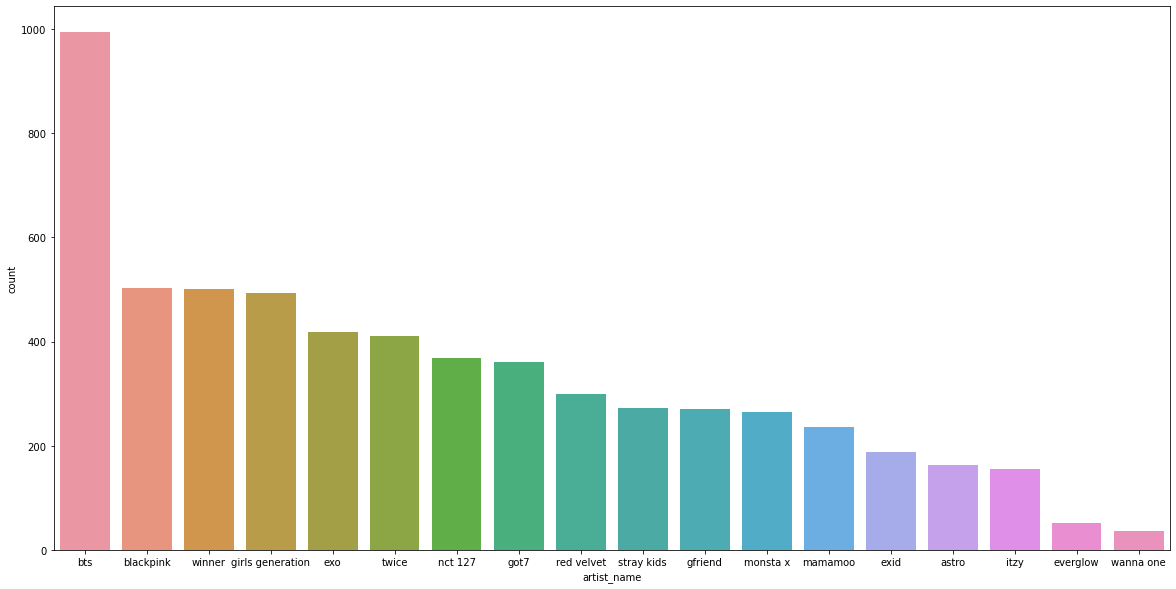

In [14]:
plt.figure(figsize = (20,10))
sns.countplot(x = 'artist_name', data=df, order=df['artist_name'].value_counts().index);

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


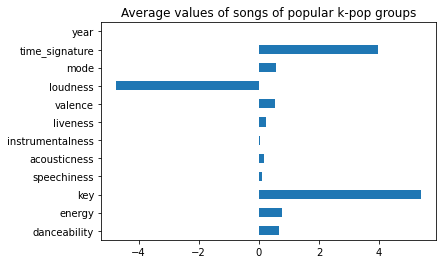

In [15]:
table = df.drop(["duration_ms","tempo"], axis=1)
table.mean().plot.barh().set_title("Average values of songs of popular k-pop groups");

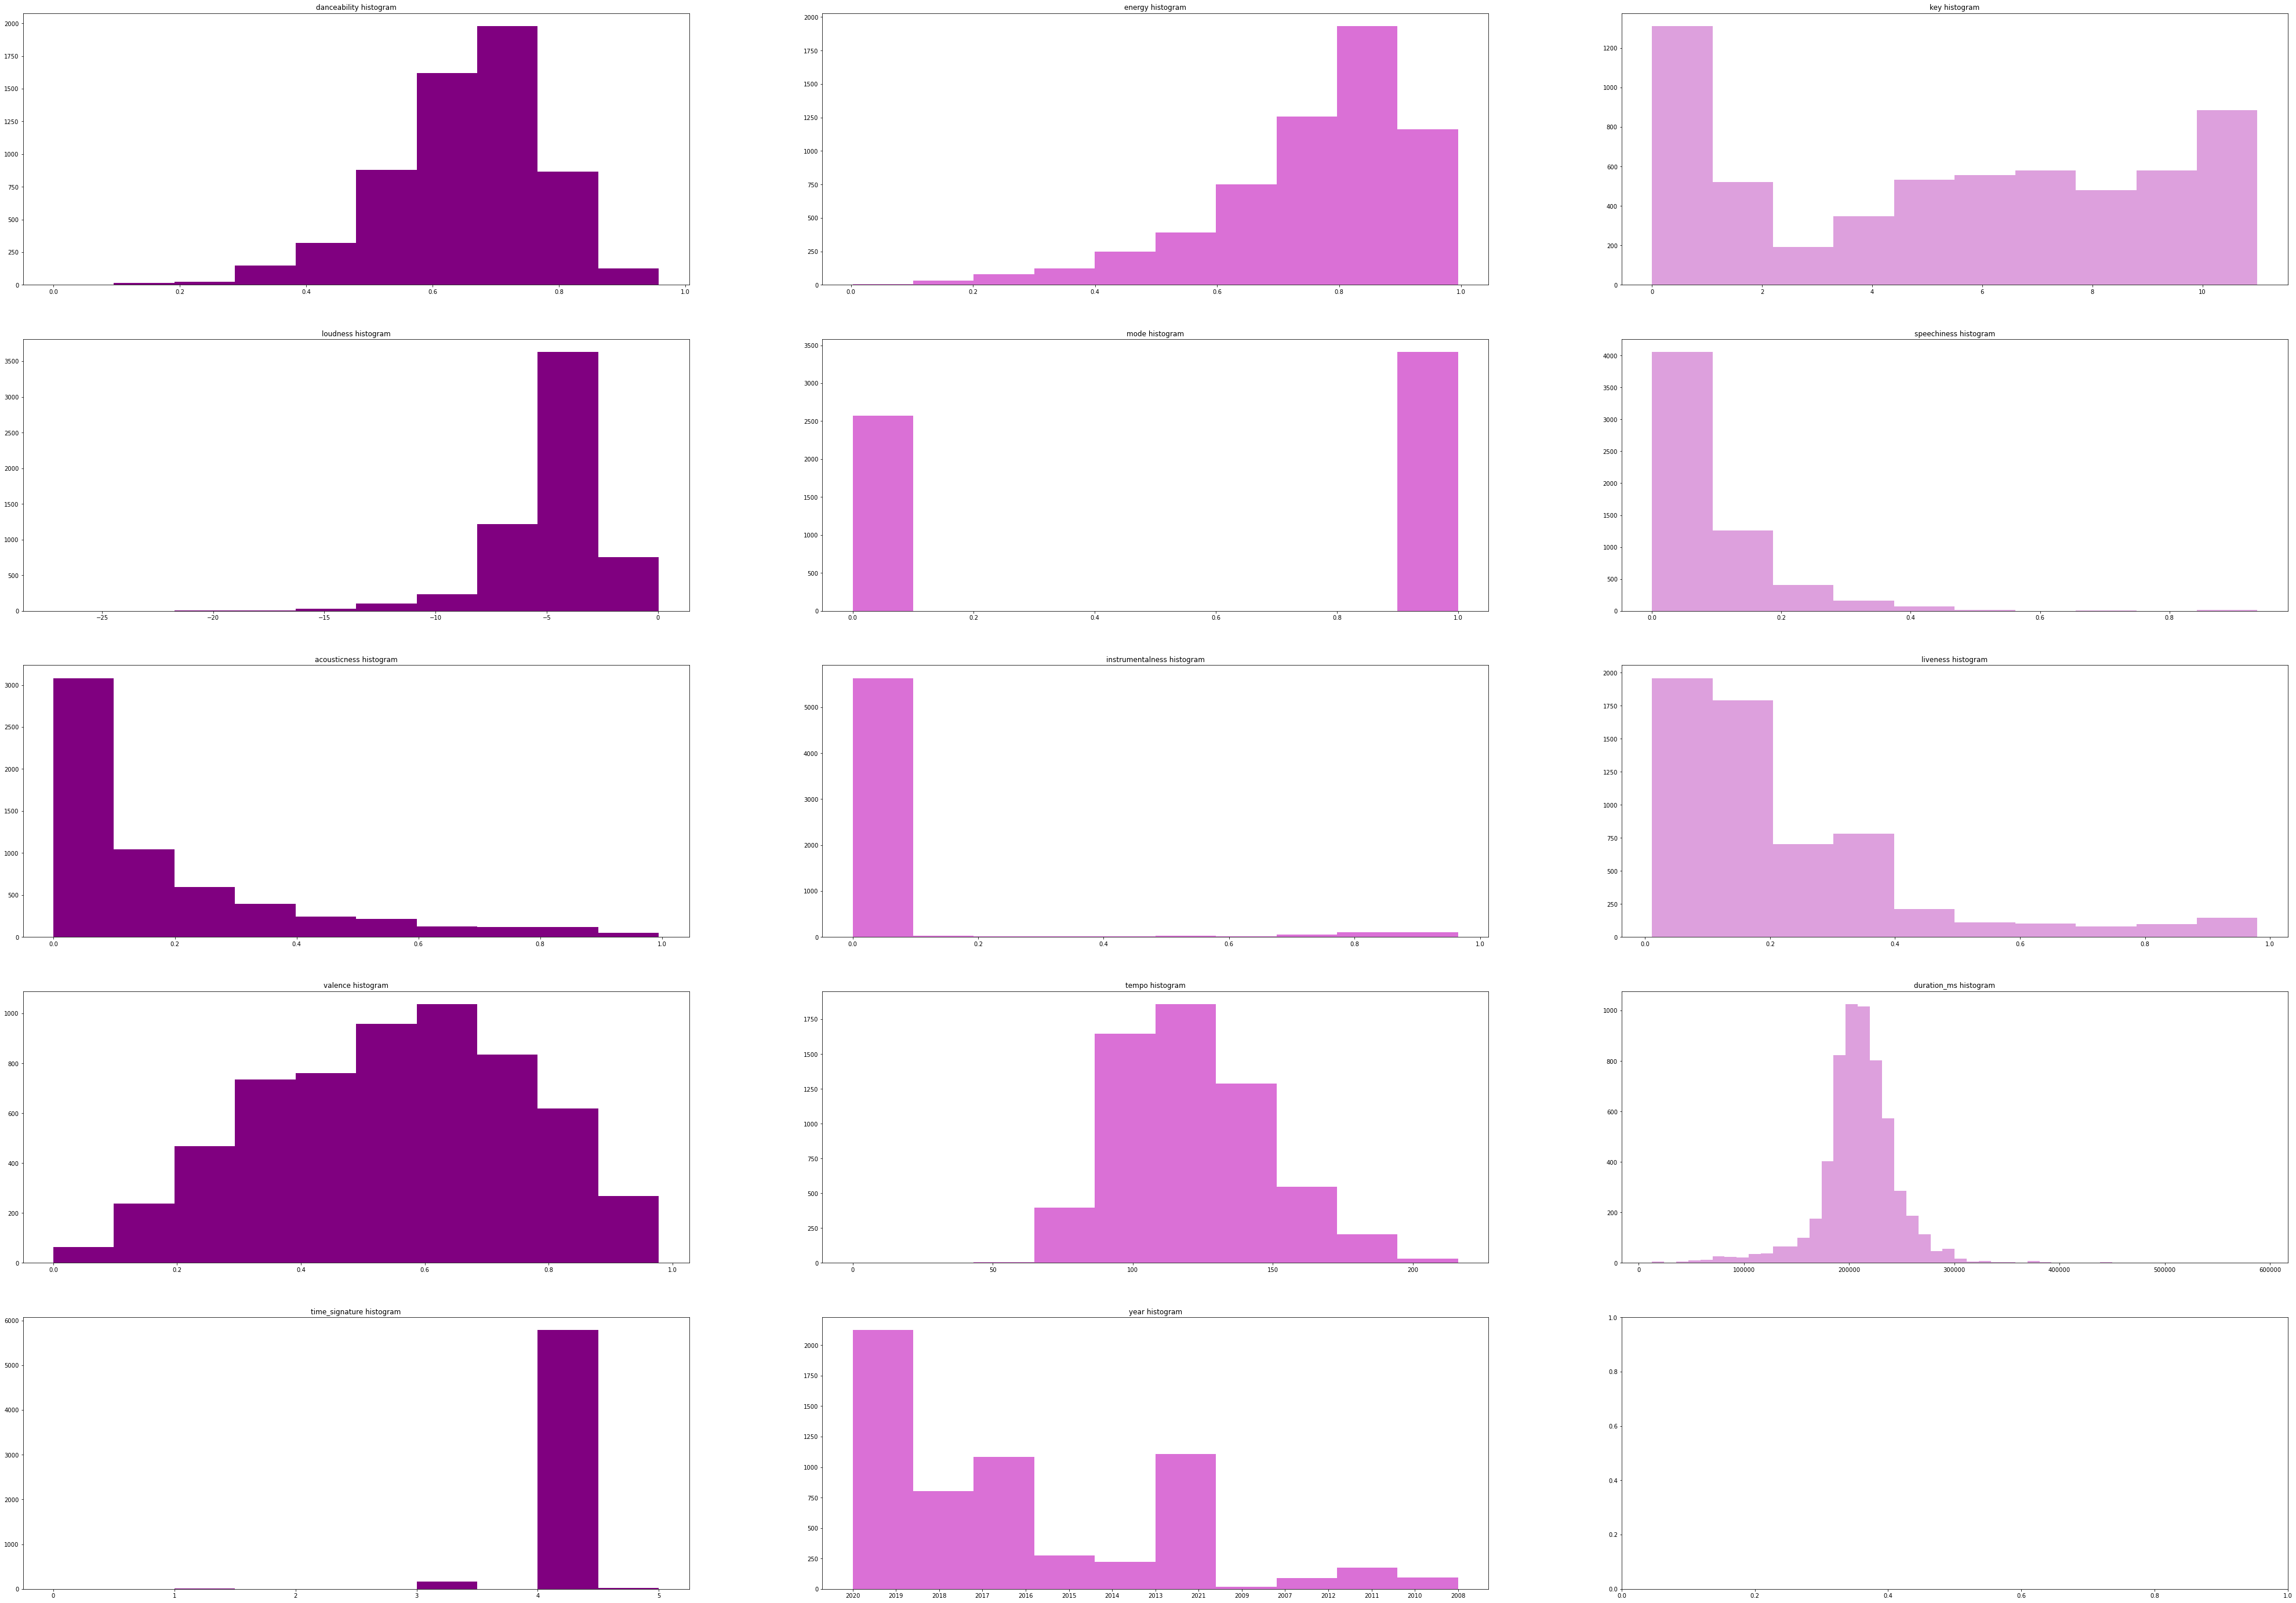

In [16]:
fig, ax = plt.subplots(5,3, figsize=(70,50))

def hist_plot(row, column, variable, binsnum, color):
    ax[row, column].hist(df[variable], bins = binsnum, color = color)
    ax[row, column].set_title(variable + ' histogram')
    
hist_plot(0, 0, 'danceability', 10, 'purple')
hist_plot(0, 1, 'energy', 10, 'orchid')
hist_plot(0, 2, 'key', 10, 'plum')
hist_plot(1,0, 'loudness', 10, 'purple')
hist_plot(1,1, 'mode', 10, 'orchid')
hist_plot(1,2, 'speechiness', 10, 'plum')
hist_plot(2,0, 'acousticness', 10, 'purple')
hist_plot(2,1, 'instrumentalness', 10, 'orchid')
hist_plot(2,2, 'liveness', 10, 'plum')
hist_plot(3,0, 'valence', 10, 'purple')
hist_plot(3,1, 'tempo', 10, 'orchid')
hist_plot(3,2, 'duration_ms', 50, 'plum')
hist_plot(4,0, 'time_signature', 10, 'purple')
hist_plot(4,1, 'year', 10, 'orchid')

plt.show()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


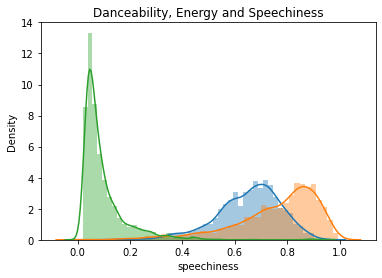

In [17]:
sns.distplot(df['danceability']); #the blue one
sns.distplot(df['energy']); #the orange one
sns.distplot(df['speechiness']).set_title("Danceability, Energy and Speechiness"); #the green one

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


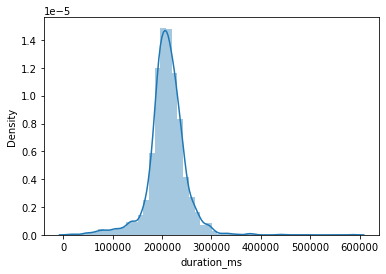

In [18]:
sns.distplot(df['duration_ms']);

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


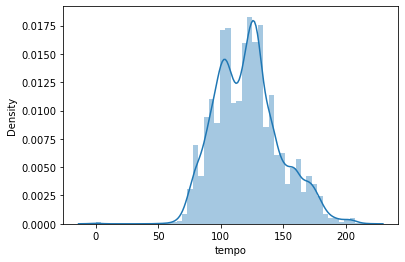

In [19]:
sns.distplot(df['tempo']);

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


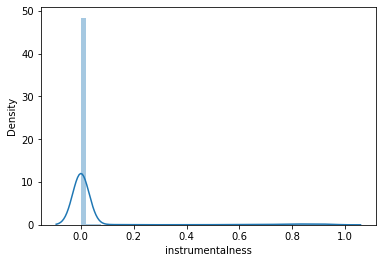

In [20]:
sns.distplot(df['instrumentalness']);

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


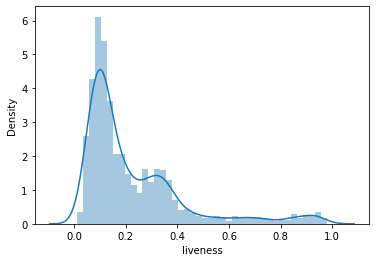

In [21]:
sns.distplot(df['liveness']);

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


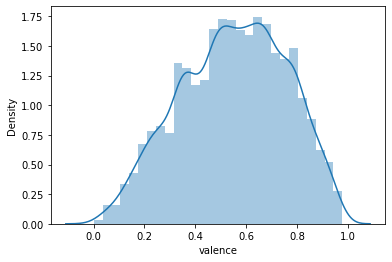

In [22]:
sns.distplot(df['valence']);

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


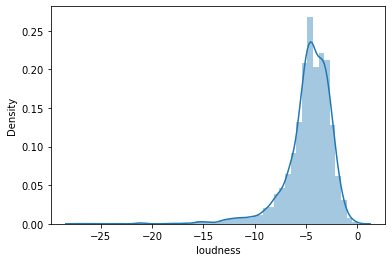

In [23]:
sns.distplot(df['loudness']);

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


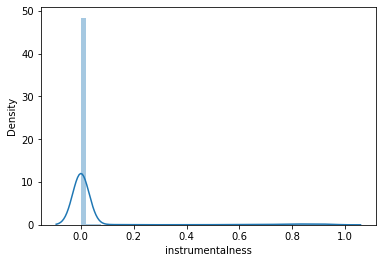

In [24]:
sns.distplot(df['instrumentalness']);

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


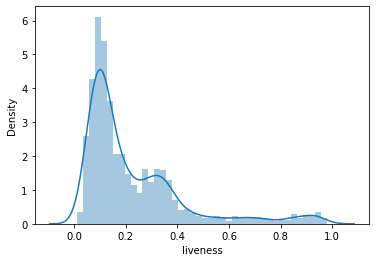

In [25]:
sns.distplot(df['liveness']);

In [26]:
mode_mapping = {1.0: "major", 0.0: "minor"}
mode = df['mode'].map(mode_mapping)
mode

0       major
1       major
2       major
3       major
4       minor
        ...  
5979    major
5980    minor
5981    major
5982    minor
5983    major
Name: mode, Length: 5984, dtype: object

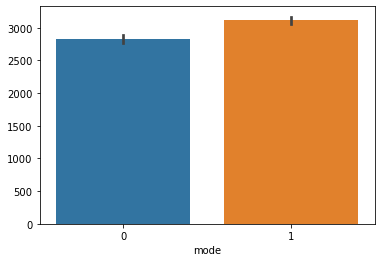

In [27]:
sns.barplot(x="mode", y=df["mode"].index, data=df);

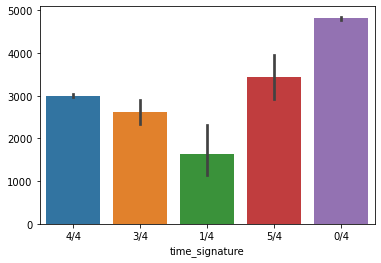

In [28]:
sns.barplot(x=time_signature, y=time_signature.index, data=df);

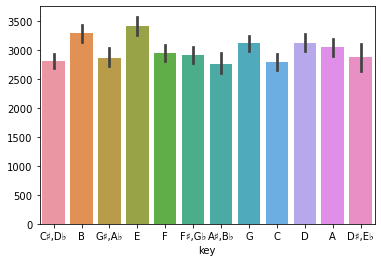

In [29]:
sns.barplot(x=key, y=key.index, data=df);

In [30]:
df.corr()

danceability    energy       key  speechiness  acousticness  \
danceability          1.000000  0.202751  0.040171    -0.065743     -0.253472   
energy                0.202751  1.000000  0.037158     0.113372     -0.590077   
key                   0.040171  0.037158  1.000000     0.033211     -0.054913   
speechiness          -0.065743  0.113372  0.033211     1.000000     -0.054525   
acousticness         -0.253472 -0.590077 -0.054913    -0.054525      1.000000   
instrumentalness     -0.105600 -0.250540 -0.012638    -0.101673      0.106138   
liveness             -0.160284  0.155644 -0.008362     0.104471      0.009281   
valence               0.475630  0.435548  0.042249     0.046202     -0.234692   
tempo                -0.108210  0.096240  0.020201     0.077879     -0.065891   
loudness              0.233581  0.734630  0.003312    -0.097021     -0.416909   
mode                 -0.117193 -0.120867 -0.153774    -0.065988      0.131610   
duration_ms          -0.127039  0.013664 -0.023826    -0.108418      0.014307   
time_signature        0.162976  0.098785  0.031267    -0.041829     -0.091460   

                  instrumentalness  liveness   valence     tempo  loudness  \
danceability             -0.105600 -0.160284  0.475630 -0.108210  0.233581   
energy                   -0.250540  0.155644  0.435548  0.096240  0.734630   
key                      -0.012638 -0.008362  0.042249  0.020201  0.003312   
speechiness              -0.101673  0.104471  0.046202  0.077879 -0.097021   
acousticness              0.106138  0.009281 -0.234692 -0.065891 -0.416909   
instrumentalness          1.000000 -0.069301 -0.175101 -0.003926 -0.390787   
liveness                 -0.069301  1.000000 -0.050885 -0.024019 -0.041880   
valence                  -0.175101 -0.050885  1.000000  0.060805  0.393932   
tempo                    -0.003926 -0.024019  0.060805  1.000000  0.068626   
loudness                 -0.390787 -0.041880  0.393932  0.068626  1.000000   
mode                      0.045916 -0.005610 -0.103792  0.073971 -0.075426   
duration_ms              -0.200721  0.028965 -0.080973  0.029710  0.083923   
time_signature           -0.005213  0.000565  0.109290  0.039527  0.118787   

                      mode  duration_ms  time_signature  
danceability     -0.117193    -0.127039        0.162976  
energy           -0.120867     0.013664        0.098785  
key              -0.153774    -0.023826        0.031267  
speechiness      -0.065988    -0.108418       -0.041829  
acousticness      0.131610     0.014307       -0.091460  
instrumentalness  0.045916    -0.200721       -0.005213  
liveness         -0.005610     0.028965        0.000565  
valence          -0.103792    -0.080973        0.109290  
tempo             0.073971     0.029710        0.039527  
loudness         -0.075426     0.083923        0.118787  
mode              1.000000     0.026401       -0.009787  
duration_ms       0.026401     1.000000        0.099706  
time_signature   -0.009787     0.099706        1.000000

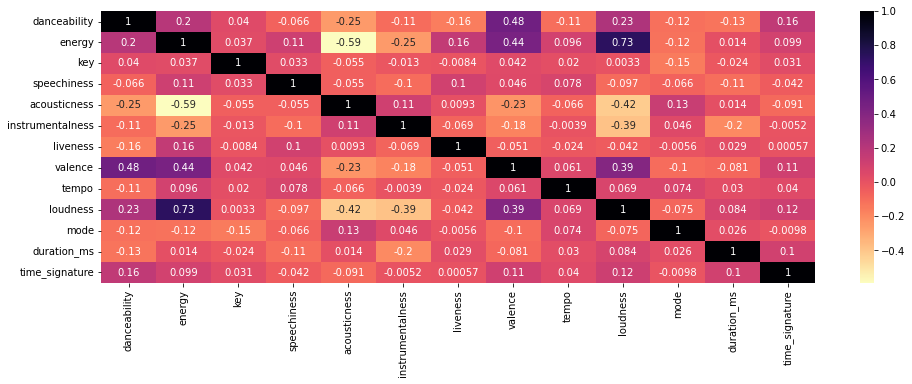

In [31]:
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), cmap="magma_r", annot=True);

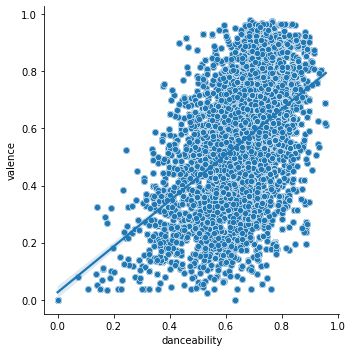

In [32]:
sns.lmplot(x="danceability",y="valence", data=df);
sns.scatterplot(x="danceability",y="valence", data=df);

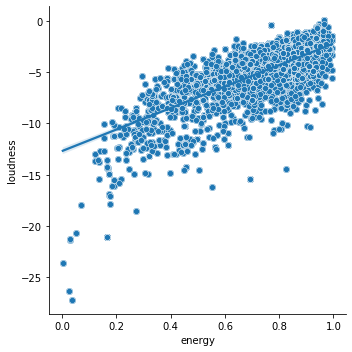

In [33]:
sns.lmplot(x="energy",y="loudness", data=df);
sns.scatterplot(x="energy",y="loudness", data=df);

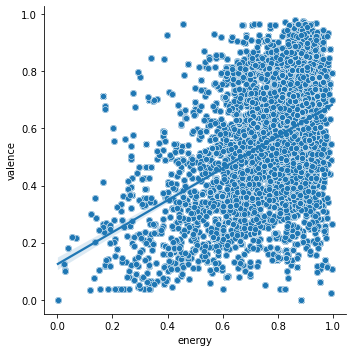

In [34]:
sns.lmplot(x="energy",y="valence", data=df);
sns.scatterplot(x="energy",y="valence", data=df);

In [35]:
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR = (Q3-Q1)*1.5
Q1,Q3,IQR

(danceability             0.582000
 energy                   0.681750
 key                      2.000000
 speechiness              0.043200
 acousticness             0.027475
 instrumentalness         0.000000
 liveness                 0.094175
 valence                  0.390000
 tempo                  102.728000
 loudness                -5.527000
 mode                     0.000000
 duration_ms         192568.750000
 time_signature           4.000000
 Name: 0.25, dtype: float64,
 danceability             0.739000
 energy                   0.876000
 key                      8.000000
 speechiness              0.113000
 acousticness             0.244250
 instrumentalness         0.000002
 liveness                 0.306000
 valence                  0.710250
 tempo                  136.072750
 loudness                -3.278500
 mode                     1.000000
 duration_ms         228293.250000
 time_signature           4.000000
 Name: 0.75, dtype: float64,
 danceability            0.23550

In [79]:
alt_sinir = Q1-IQR
ust_sinir = IQR+Q3

In [80]:
alt_sinir, ust_sinir

(danceability             0.346500
 energy                   0.390375
 key                     -7.000000
 speechiness             -0.061500
 acousticness            -0.297687
 instrumentalness        -0.000003
 liveness                -0.223562
 valence                 -0.090375
 tempo                   52.710875
 loudness                -8.899750
 mode                    -1.500000
 duration_ms         138982.000000
 time_signature           4.000000
 dtype: float64,
 danceability             0.974500
 energy                   1.167375
 key                     17.000000
 speechiness              0.217700
 acousticness             0.569412
 instrumentalness         0.000005
 liveness                 0.623738
 valence                  1.190625
 tempo                  186.089875
 loudness                 0.094250
 mode                     2.500000
 duration_ms         281880.000000
 time_signature           4.000000
 dtype: float64)

In [81]:
ust_sinir

danceability             0.974500
energy                   1.167375
key                     17.000000
speechiness              0.217700
acousticness             0.569412
instrumentalness         0.000005
liveness                 0.623738
valence                  1.190625
tempo                  186.089875
loudness                 0.094250
mode                     2.500000
duration_ms         281880.000000
time_signature           4.000000
dtype: float64

In [82]:
aykiri_tf = (df<alt_sinir) | (df>ust_sinir)

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`


In [84]:
df[aykiri_tf]

danceability  energy  key  speechiness  acousticness  instrumentalness  \
0              NaN     NaN  NaN          NaN           NaN               NaN   
1              NaN     NaN  NaN          NaN           NaN               NaN   
2              NaN     NaN  NaN          NaN           NaN               NaN   
3              NaN   0.321  NaN        0.884         0.864               NaN   
4              NaN     NaN  NaN          NaN           NaN               NaN   
...            ...     ...  ...          ...           ...               ...   
5979           NaN     NaN  NaN          NaN           NaN          0.003860   
5980           NaN     NaN  NaN          NaN           NaN          0.000042   
5981           NaN     NaN  NaN          NaN           NaN          0.003860   
5982           NaN     NaN  NaN          NaN           NaN          0.000042   
5983           NaN     NaN  NaN          NaN           NaN          0.003860   

      liveness  valence  tempo  loudness  mode  duration_ms  time_signature  \
0          NaN      NaN    NaN       NaN   NaN          NaN             NaN   
1          NaN      NaN    NaN       NaN   NaN          NaN             NaN   
2          NaN      NaN    NaN       NaN   NaN          NaN             NaN   
3        0.908      NaN    NaN   -13.135   NaN          NaN             NaN   
4          NaN      NaN    NaN       NaN   NaN          NaN             NaN   
...        ...      ...    ...       ...   ...          ...             ...   
5979       NaN      NaN    NaN       NaN   NaN          NaN             NaN   
5980       NaN      NaN    NaN       NaN   NaN          NaN             NaN   
5981       NaN      NaN    NaN       NaN   NaN          NaN             NaN   
5982       NaN      NaN    NaN       NaN   NaN          NaN             NaN   
5983       NaN      NaN    NaN       NaN   NaN          NaN             NaN   

      target  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
...      ...  
5979     NaN  
5980     NaN  
5981     NaN  
5982     NaN  
5983     NaN  

[5984 rows x 14 columns]

In [87]:
t_df = df[~aykiri_tf]
t_df

danceability  energy  key  speechiness  acousticness  instrumentalness  \
0            0.566   0.716    1       0.0424       0.00691               0.0   
1            0.764   0.526   11       0.2120       0.04840               0.0   
2            0.547   0.605    8       0.0415       0.42000               0.0   
3            0.703     NaN    4          NaN           NaN               0.0   
4            0.787   0.669    5       0.0428       0.00782               0.0   
...            ...     ...  ...          ...           ...               ...   
5979         0.745   0.951    5       0.0527       0.04280               NaN   
5980         0.790   0.853   11       0.0665       0.00116               NaN   
5981         0.745   0.951    5       0.0527       0.04280               NaN   
5982         0.790   0.853   11       0.0666       0.00116               NaN   
5983         0.745   0.951    5       0.0527       0.04280               NaN   

      liveness  valence    tempo  loudness  mode  duration_ms  time_signature  \
0       0.3700    0.450   81.068    -5.733     1     207481.0             4.0   
1       0.0718    0.588  114.910    -7.355     1     222243.0             4.0   
2       0.1250    0.364  121.953    -6.755     1     254950.0             4.0   
3          NaN    0.544  114.822       NaN     1     179548.0             4.0   
4       0.1230    0.570  104.994    -4.333     0     202313.0             4.0   
...        ...      ...      ...       ...   ...          ...             ...   
5979    0.2030    0.606  127.945    -2.425     1     200303.0             4.0   
5980    0.3290    0.713  124.998    -4.564     0     199874.0             4.0   
5981    0.2030    0.606  127.957    -2.425     1     200303.0             4.0   
5982    0.3290    0.713  125.000    -4.564     0     199874.0             4.0   
5983    0.2030    0.606  127.945    -2.425     1     200303.0             4.0   

      target  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5979       0  
5980       0  
5981       0  
5982       0  
5983       0  

[5984 rows x 14 columns]

In [36]:
df['target'] = [1 if i == 'bts' else 0 for i in df.artist_name]
df["target"]

0       1
1       1
2       1
3       1
4       1
       ..
5979    0
5980    0
5981    0
5982    0
5983    0
Name: target, Length: 5984, dtype: int64

In [37]:
df.corr()['target'].sort_values()

danceability       -0.166554
acousticness       -0.142900
mode               -0.106347
instrumentalness   -0.093666
liveness           -0.091438
valence            -0.091300
loudness           -0.074586
time_signature     -0.044008
tempo              -0.017158
key                 0.005927
energy              0.011547
duration_ms         0.162931
speechiness         0.219510
target              1.000000
Name: target, dtype: float64

In [38]:
df.groupby('artist_name').agg({'speechiness':'mean', 'instrumentalness':'mean', 'danceability':'mean', 'energy':'mean','acousticness':'mean'}).sort_values('speechiness', ascending = False)

speechiness  instrumentalness  danceability    energy  \
artist_name                                                               
bts                  0.140292          0.005332      0.607638  0.763520   
stray kids           0.123945          0.019142      0.682117  0.808604   
astro                0.113485          0.025149      0.665245  0.717318   
monsta x             0.113213          0.011062      0.662698  0.786596   
nct 127              0.103005          0.031032      0.661843  0.766117   
mamamoo              0.091409          0.031082      0.640428  0.720699   
blackpink            0.090646          0.014259      0.664980  0.707219   
wanna one            0.090505          0.000000      0.601189  0.777432   
itzy                 0.089586          0.095339      0.775387  0.821787   
exo                  0.087491          0.026118      0.621045  0.780778   
got7                 0.085426          0.019951      0.700694  0.778833   
red velvet           0.083798          0.101727      0.631260  0.711803   
twice                0.080698          0.028084      0.722780  0.802729   
winner               0.079064          0.003386      0.642450  0.740734   
exid                 0.070910          0.131959      0.675412  0.759663   
girls generation     0.070435          0.054738      0.663149  0.785112   
gfriend              0.058144          0.247166      0.603519  0.709930   
everglow             0.055478          0.312075      0.593176  0.657784   

                  acousticness  
artist_name                     
bts                   0.111164  
stray kids            0.100678  
astro                 0.202674  
monsta x              0.132459  
nct 127               0.158400  
mamamoo               0.365692  
blackpink             0.160491  
wanna one             0.181265  
itzy                  0.065938  
exo                   0.184433  
got7                  0.136182  
red velvet            0.236088  
twice                 0.152908  
winner                0.241950  
exid                  0.214600  
girls generation      0.244338  
gfriend               0.265350  
everglow              0.316899

Text(0.5, 1.0, 'Target Based on Mode and Key')

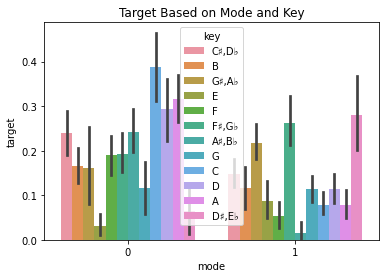

In [39]:
sns.barplot(x = 'mode', y = 'target', hue = key, data = df);
plt.title('Target Based on Mode and Key')

In [40]:
chosen = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
text1 = df["artist_name"] + " - " + df["song_name"]
text2 = text1.values

X = df[chosen].values
y = df["danceability"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=8,
        color=y
    )
)

fig = go.Figure(data=[trace])
py.iplot(fig, filename="test-graph")

In [41]:
chosen = ["energy", "liveness", "tempo", "valence"]
text1 = df["artist_name"] + " - " + df["song_name"]
text2 = text1.values

X = df[chosen].values
y = df["loudness"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X)

X = pca.transform(X)

fig = {
    "data": [
        {
            "x": X[:, 0],
            "y": X[:, 1],
            "text": text2,
            "mode": "markers",
            "marker": {"size": "8", "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "How hard is this to dance to?"},
        "yaxis": {"title": "How metal is this?"}
    }
}

py.iplot(fig, filename="test-graph2")

In [42]:
import time

chosen = ["energy", "liveness", "tempo", "valence", "loudness",
          "speechiness", "acousticness", "danceability", "instrumentalness"]

X = df[chosen].values
y = df["loudness"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

fig = {
    "data": [
        {
            "x": tsne_results[:, 0],
            "y": tsne_results[:, 1],
            "text": text2,
            "mode": "markers",
            "marker": {"size": "8", "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "x-tsne"},
        "yaxis": {"title": "y-tsne"}
    }
}

py.iplot(fig, filename="test-graph2")

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5984 samples in 0.020s...
[t-SNE] Computed neighbors for 5984 samples in 0.516s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5984
[t-SNE] Computed conditional probabilities for sample 2000 / 5984
[t-SNE] Computed conditional probabilities for sample 3000 / 5984
[t-SNE] Computed conditional probabilities for sample 4000 / 5984
[t-SNE] Computed conditional probabilities for sample 5000 / 5984
[t-SNE] Computed conditional probabilities for sample 5984 / 5984
[t-SNE] Mean sigma: 0.094457
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.008308
[t-SNE] KL divergence after 300 iterations: 2.119630
t-SNE done! Time elapsed: 8.416351079940796 seconds


In [43]:
df = df.drop(columns=["release_date","song_name_formatted","song_name","artist_name","year"])

In [44]:
y = df.target
X = df.drop("target",axis=1)

In [45]:
X, y

(      danceability  energy  key  speechiness  acousticness  instrumentalness  \
 0            0.566   0.716    1       0.0424       0.00691          0.000000   
 1            0.764   0.526   11       0.2120       0.04840          0.000000   
 2            0.547   0.605    8       0.0415       0.42000          0.000000   
 3            0.703   0.321    4       0.8840       0.86400          0.000000   
 4            0.787   0.669    5       0.0428       0.00782          0.000000   
 ...            ...     ...  ...          ...           ...               ...   
 5979         0.745   0.951    5       0.0527       0.04280          0.003860   
 5980         0.790   0.853   11       0.0665       0.00116          0.000042   
 5981         0.745   0.951    5       0.0527       0.04280          0.003860   
 5982         0.790   0.853   11       0.0666       0.00116          0.000042   
 5983         0.745   0.951    5       0.0527       0.04280          0.003860   
 
       liveness  valence  

In [46]:
X.shape, y.shape

((5984, 13), (5984,))

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state = 420)
print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)

print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)


X_train:

      danceability  energy  key  speechiness  acousticness  instrumentalness  \
4827         0.704   0.826    6       0.1380      0.022100               0.0   
2952         0.405   0.248    8       0.0495      0.906000               0.0   
2633         0.651   0.748   11       0.3430      0.157000               0.0   
5129         0.725   0.826    0       0.0368      0.113000               0.0   
3344         0.899   0.610   10       0.2410      0.000557               0.0   

      liveness  valence    tempo  loudness  mode  duration_ms  time_signature  
4827    0.0803    0.803  107.523    -2.195     0       257280               4  
2952    0.9550    0.133  118.060   -12.816     0       232560               4  
2633    0.1020    0.767  167.964    -3.764     0       206430               4  
5129    0.1260    0.424  116.931    -3.588     0       190794               4  
3344    0.1110    0.341  156.012    -8.694     0       166161               4  
(4488, 13)

X_test:

      d

In [48]:
"""log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_predict = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_predict)
print("Accuracy: " + str(log_reg_accuracy))
log_reg_f1_score = mt.f1_score(y_test, log_reg_predict)
log_reg_AUC = roc_auc_score(y_test, log_reg_predict) 
print("AUC: " + str(log_reg_AUC))
print("F1 Score: ", log_reg_f1_score)"""

'log_reg = LogisticRegression()\nlog_reg.fit(X_train, y_train)\nlog_reg_predict = log_reg.predict(X_test)\nlog_reg_accuracy = accuracy_score(y_test, log_reg_predict)\nprint("Accuracy: " + str(log_reg_accuracy))\nlog_reg_f1_score = mt.f1_score(y_test, log_reg_predict)\nlog_reg_AUC = roc_auc_score(y_test, log_reg_predict) \nprint("AUC: " + str(log_reg_AUC))\nprint("F1 Score: ", log_reg_f1_score)'

In [49]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_predict = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_predict)
print("Accuracy: " + str(random_forest_accuracy))
random_forest_f1_score = mt.f1_score(y_test, random_forest_predict)
random_forest_AUC = roc_auc_score(y_test, random_forest_predict) 
print("AUC: " + str(random_forest_AUC))
print("F1 Score: ", random_forest_f1_score)

Accuracy: 0.9926470588235294
AUC: 0.97975680089828
F1 Score:  0.9777777777777779


In [50]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predict = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predict)
print("Accuracy: " + str(knn_accuracy))
knn_f1= mt.f1_score(y_test, knn_predict)
knn_AUC = roc_auc_score(y_test, knn_predict) 
print("AUC: " + str(knn_AUC))
print("F1 Score: ", knn_f1)

Accuracy: 0.9171122994652406
AUC: 0.8789618741387231
F1 Score:  0.7695167286245354


In [51]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
decision_tree_predict = decision_tree_model.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predict)
print("Accuracy: " + str(decision_tree_accuracy))
decision_tree_f1_score = mt.f1_score(y_test, decision_tree_predict)
decision_tree_AUC = roc_auc_score(y_test, decision_tree_predict) 
print("AUC: " + str(decision_tree_AUC))
print("F1 Score: ", decision_tree_f1_score )

Accuracy: 0.9618983957219251
AUC: 0.9644324503649263
F1 Score:  0.8954128440366972


In [52]:
XGB_model = XGBClassifier(objective = "binary:logistic", n_estimators = 10, seed = 123)
XGB_model.fit(X_train, y_train)
XGB_predict = XGB_model.predict(X_test)
XGB_accuracy = accuracy_score(y_test, XGB_predict)
print("Accuracy: " + str(XGB_accuracy))
XGB_f1_score= mt.f1_score(y_test, XGB_predict)
XGB_AUC = roc_auc_score(y_test, XGB_predict) 
print("AUC: " + str(XGB_AUC))
print("F1 Score: ", XGB_f1_score)

[19:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9625668449197861
AUC: 0.923697238809779
F1 Score:  0.8861788617886179


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


In [53]:
LGB_model = lgb.LGBMClassifier()
LGB_model.fit(X_train, y_train)
LGB_predict = LGB_model.predict(X_test)
LGB_accuracy=accuracy_score(y_test, LGB_predict)
print("Accuracy: " + str(LGB_accuracy))
LGB_f1_score= mt.f1_score(y_test, LGB_predict)
LGB_AUC = roc_auc_score(y_test, LGB_predict) 
print("AUC: " + str(LGB_AUC))
print("F1 Score: ", LGB_f1_score)

Accuracy: 0.9906417112299465
AUC: 0.9785510131169296
F1 Score:  0.9718875502008032


In [54]:
GCB_model = GradientBoostingClassifier()
GCB_model.fit(X_train, y_train)
GCB_predict = GCB_model.predict(X_test)
GCB_accuracy=accuracy_score(y_test, GCB_predict)
print("Accuracy: " + str(GCB_accuracy))
GCB_f1_score= mt.f1_score(y_test, GCB_predict)
GCB_AUC = roc_auc_score(y_test, GCB_predict) 
print("AUC: " + str(GCB_AUC))
print("F1 Score: ", GCB_f1_score)

Accuracy: 0.9398395721925134
AUC: 0.8594013167968152
F1 Score:  0.8051948051948051


In [55]:
model_performance = pd.DataFrame({'Model': ['RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      'XGBClassifier',
                                                       'LGBClassifier',
                                                       'GBClassifier'],
                                           
                                            'Accuracy': [random_forest_accuracy,
                                                         knn_accuracy,
                                                         decision_tree_accuracy,
                                                         XGB_accuracy,
                                                        LGB_accuracy,
                                                        GCB_accuracy],
                                  
                                                  'AUC': [random_forest_AUC,
                                                         knn_AUC,
                                                         decision_tree_AUC,
                                                         XGB_AUC,
                                                         LGB_AUC,
                                                         GCB_AUC],
                                  
                                                  'F1_Score': [random_forest_f1_score,
                                                                knn_f1,
                                                                decision_tree_f1_score,
                                                                XGB_f1_score,
                                                                LGB_f1_score,
                                                                GCB_f1_score],
                                  
                                          })


In [56]:
model_performance

Model  Accuracy       AUC  F1_Score
0  RandomForestClassifier  0.992647  0.979757  0.977778
1    KNeighborsClassifier  0.917112  0.878962  0.769517
2  DecisionTreeClassifier  0.961898  0.964432  0.895413
3           XGBClassifier  0.962567  0.923697  0.886179
4           LGBClassifier  0.990642  0.978551  0.971888
5            GBClassifier  0.939840  0.859401  0.805195

In [57]:
model_performance.sort_values(by = "AUC", ascending = False)

Model  Accuracy       AUC  F1_Score
0  RandomForestClassifier  0.992647  0.979757  0.977778
4           LGBClassifier  0.990642  0.978551  0.971888
2  DecisionTreeClassifier  0.961898  0.964432  0.895413
3           XGBClassifier  0.962567  0.923697  0.886179
1    KNeighborsClassifier  0.917112  0.878962  0.769517
5            GBClassifier  0.939840  0.859401  0.805195

### Random Forest Classifier is the best model for our project!

In [58]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

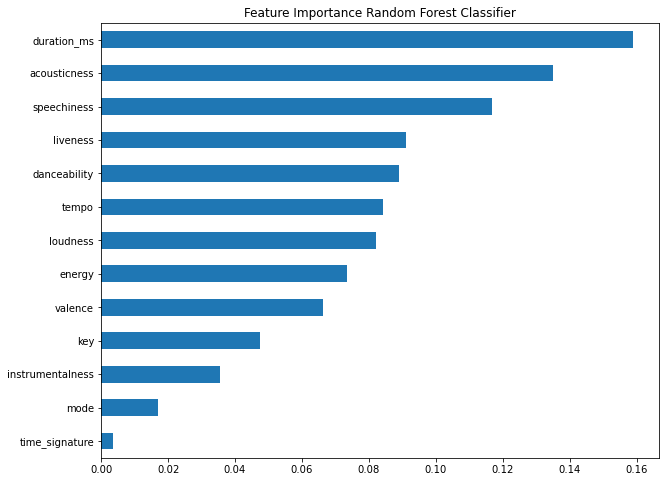

In [59]:
importance_series = pd.Series(data=random_forest_model.feature_importances_, index=X_test.columns)
ax = importance_series.sort_values().plot(kind='barh', figsize=(10,8))
ax.set_title('Feature Importance Random Forest Classifier');

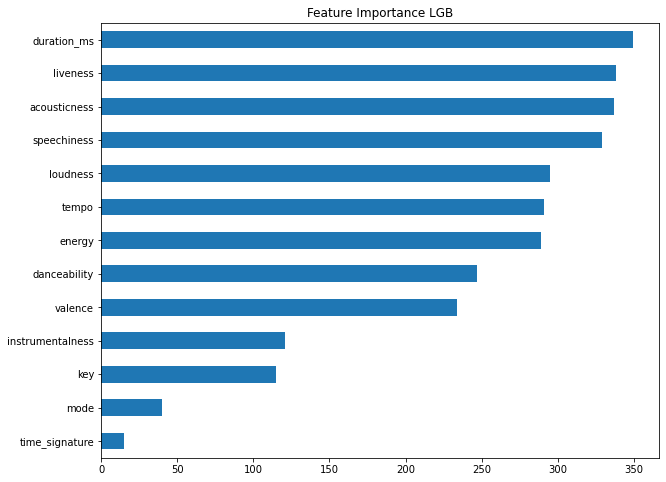

In [60]:
importance_series = pd.Series(data=LGB_model.feature_importances_, index=X_test.columns)
ax = importance_series.sort_values().plot(kind='barh', figsize=(10,8))
ax.set_title('Feature Importance LGB');

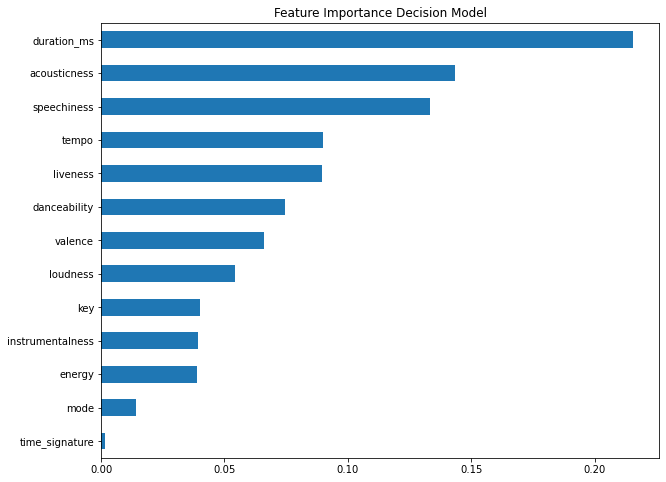

In [61]:
importance_series = pd.Series(data=decision_tree_model.feature_importances_, index=X_test.columns)
ax = importance_series.sort_values().plot(kind='barh', figsize=(10,8))
ax.set_title('Feature Importance Decision Model');

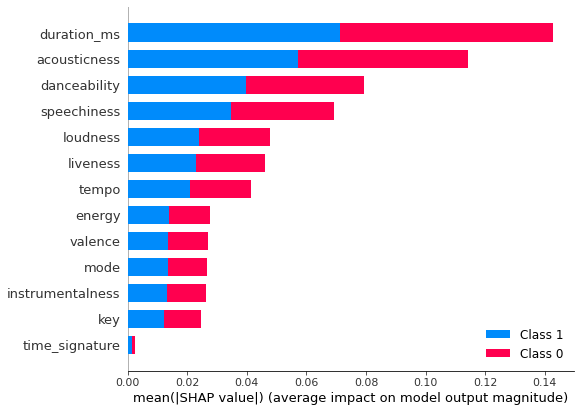

In [62]:
explainer = shap.TreeExplainer(random_forest_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type = "bar")

# Comparing BTS with Global artists

In [63]:
df_kpop = kpopgroups.copy()
df_kpop = df_kpop.drop(columns=["Unnamed: 0"])
df_kpop.head()

danceability  energy  key  speechiness  acousticness  instrumentalness  \
0         0.566   0.716    1       0.0424       0.00691               0.0   
1         0.764   0.526   11       0.2120       0.04840               0.0   
2         0.547   0.605    8       0.0415       0.42000               0.0   
3         0.703   0.321    4       0.8840       0.86400               0.0   
4         0.787   0.669    5       0.0428       0.00782               0.0   

   liveness  valence    tempo  loudness  mode  duration_ms  time_signature  \
0    0.3700    0.450   81.068    -5.733     1       207481               4   
1    0.0718    0.588  114.910    -7.355     1       222243               4   
2    0.1250    0.364  121.953    -6.755     1       254950               4   
3    0.9080    0.544  114.822   -13.135     1       179548               4   
4    0.1230    0.570  104.994    -4.333     0       202313               4   

  artist_name release_date       song_name song_name_formatted  
0         BTS   2020-11-20    Life Goes On        life-goes-on  
1         BTS   2020-11-20  Fly To My Room      fly-to-my-room  
2         BTS   2020-11-20     Blue & Grey           blue-grey  
3         BTS   2020-11-20            Skit                skit  
4         BTS   2020-11-20       Telepathy           telepathy

In [64]:
df.shape

(5984, 14)

In [65]:
global_artists= pd.read_csv("global_artists.csv")
global_artists2 = pd.read_csv("global_artists2.csv")
global_artists= global_artists.append(global_artists2)
global_artists

Unnamed: 0  danceability  energy  key  speechiness  acousticness  \
0              0         0.594   0.713    9       0.0503      0.000328   
1              1         0.516   0.777    1       0.0375      0.001080   
2              2         0.645   0.593    2       0.0288      0.034400   
3              3         0.584   0.557    6       0.0342      0.012900   
4              4         0.440   0.528    0       0.0317      0.017100   
...          ...           ...     ...  ...          ...           ...   
1753        1753         0.768   0.935   11       0.0598      0.048800   
1754        1754         0.727   0.652    2       0.0490      0.052700   
1755        1755         0.787   0.814   11       0.0395      0.004700   
1756        1756         0.798   0.665    7       0.0437      0.021000   
1757        1757         0.795   0.845   11       0.0682      0.257000   

      instrumentalness  liveness  valence    tempo  loudness  mode  \
0             0.000000    0.1140    0.328  129.958    -5.314     1   
1             0.000002    0.0761    0.408  125.047    -4.908     0   
2             0.000127    0.1300    0.299  109.984    -6.506     1   
3             0.000000    0.0576    0.767  154.008    -6.371     1   
4             0.002030    0.2340    0.132  185.972    -7.809     1   
...                ...       ...      ...      ...       ...   ...   
1753          0.001170    0.3390    0.800  125.971    -4.902     0   
1754          0.000001    0.2980    0.423  124.042    -5.683     1   
1755          0.025500    0.0652    0.280  113.987    -7.985     0   
1756          0.002900    0.0776    0.645  135.088    -4.674     1   
1757          0.012500    0.3520    0.482  109.034    -3.514     0   

      duration_ms  time_signature   artist_name release_date  \
0          295413               4  Taylor Swift   2021-11-12   
1          223093               4  Taylor Swift   2021-11-12   
2          242720               4  Taylor Swift   2021-11-12   
3          219760               4  Taylor Swift   2021-11-12   
4          329160               4  Taylor Swift   2021-11-12   
...           ...             ...           ...          ...   
1753       189577               4    Ed Sheeran   2021-08-06   
1754       179201               4    Ed Sheeran   2021-08-06   
1755       327394               4    Ed Sheeran   2021-08-06   
1756       224023               4    Ed Sheeran   2021-08-06   
1757       210413               4    Ed Sheeran   2021-08-06   

                                       song_name  \
0              State Of Grace (Taylor's Version)   
1                         Red (Taylor's Version)   
2                 Treacherous (Taylor's Version)   
3     I Knew You Were Trouble (Taylor's Version)   
4                All Too Well (Taylor's Version)   
...                                          ...   
1753               Bad Habits - Joel Corry Remix   
1754                   Bad Habits - Jubël Remode   
1755       Bad Habits - Kooldrink Amapiano Remix   
1756                    Bad Habits - SHAUN Remix   
1757         Bad Habits - Ovy On The Drums Remix   

                song_name_formatted  
0                    state-of-grace  
1                               red  
2                       treacherous  
3           i-knew-you-were-trouble  
4                      all-too-well  
...                             ...  
1753          bad-habits-joel-remix  
1754                     bad-habits  
1755               bad-habits-remix  
1756         bad-habits-shaun-remix  
1757  bad-habits-on-the-drums-remix  

[3738 rows x 18 columns]

In [66]:
global_artists3 = pd.read_csv("global_artists3.csv")
global_artists= global_artists.append(global_artists3)
global_artists

Unnamed: 0  danceability  energy  key  speechiness  acousticness  \
0              0         0.594   0.713    9       0.0503      0.000328   
1              1         0.516   0.777    1       0.0375      0.001080   
2              2         0.645   0.593    2       0.0288      0.034400   
3              3         0.584   0.557    6       0.0342      0.012900   
4              4         0.440   0.528    0       0.0317      0.017100   
...          ...           ...     ...  ...          ...           ...   
1817        1817         0.574   0.793   11       0.0321      0.008140   
1818        1818         0.361   0.870    7       0.1360      0.001020   
1819        1819         0.724   0.757    9       0.0274      0.007770   
1820        1820         0.586   0.979   11       0.0526      0.000604   
1821        1821         0.343   0.882    2       0.0913      0.000359   

      instrumentalness  liveness  valence    tempo  loudness  mode  \
0             0.000000    0.1140    0.328  129.958    -5.314     1   
1             0.000002    0.0761    0.408  125.047    -4.908     0   
2             0.000127    0.1300    0.299  109.984    -6.506     1   
3             0.000000    0.0576    0.767  154.008    -6.371     1   
4             0.002030    0.2340    0.132  185.972    -7.809     1   
...                ...       ...      ...      ...       ...   ...   
1817          0.008740    0.1610    0.678  119.977    -6.059     0   
1818          0.000896    0.4380    0.472  175.133    -4.527     1   
1819          0.000154    0.2150    0.878  109.980    -4.787     0   
1820          0.000496    0.1130    0.640  102.527    -6.387     0   
1821          0.516000    0.0759    0.394  105.005    -5.965     1   

      duration_ms  time_signature     artist_name release_date  \
0          295413               4    Taylor Swift   2021-11-12   
1          223093               4    Taylor Swift   2021-11-12   
2          242720               4    Taylor Swift   2021-11-12   
3          219760               4    Taylor Swift   2021-11-12   
4          329160               4    Taylor Swift   2021-11-12   
...           ...             ...             ...          ...   
1817       176520               4  Arctic Monkeys   2007-07-08   
1818       173520               4  Arctic Monkeys   2007-07-08   
1819       183253               4  Arctic Monkeys   2007-07-08   
1820       142547               4  Arctic Monkeys   2007-06-18   
1821       298947               4  Arctic Monkeys   2007-06-18   

                                       song_name      song_name_formatted  
0              State Of Grace (Taylor's Version)           state-of-grace  
1                         Red (Taylor's Version)                      red  
2                 Treacherous (Taylor's Version)              treacherous  
3     I Knew You Were Trouble (Taylor's Version)  i-knew-you-were-trouble  
4                All Too Well (Taylor's Version)             all-too-well  
...                                          ...                      ...  
1817                                  The Bakery               the-bakery  
1818                               Plastic Tramp            plastic-tramp  
1819                             Too Much To Ask          too-much-to-ask  
1820                                 Da Frame 2R                    frame  
1821                                     Matador                  matador  

[5560 rows x 18 columns]

In [67]:
df_global=global_artists.copy()
df_global

Unnamed: 0  danceability  energy  key  speechiness  acousticness  \
0              0         0.594   0.713    9       0.0503      0.000328   
1              1         0.516   0.777    1       0.0375      0.001080   
2              2         0.645   0.593    2       0.0288      0.034400   
3              3         0.584   0.557    6       0.0342      0.012900   
4              4         0.440   0.528    0       0.0317      0.017100   
...          ...           ...     ...  ...          ...           ...   
1817        1817         0.574   0.793   11       0.0321      0.008140   
1818        1818         0.361   0.870    7       0.1360      0.001020   
1819        1819         0.724   0.757    9       0.0274      0.007770   
1820        1820         0.586   0.979   11       0.0526      0.000604   
1821        1821         0.343   0.882    2       0.0913      0.000359   

      instrumentalness  liveness  valence    tempo  loudness  mode  \
0             0.000000    0.1140    0.328  129.958    -5.314     1   
1             0.000002    0.0761    0.408  125.047    -4.908     0   
2             0.000127    0.1300    0.299  109.984    -6.506     1   
3             0.000000    0.0576    0.767  154.008    -6.371     1   
4             0.002030    0.2340    0.132  185.972    -7.809     1   
...                ...       ...      ...      ...       ...   ...   
1817          0.008740    0.1610    0.678  119.977    -6.059     0   
1818          0.000896    0.4380    0.472  175.133    -4.527     1   
1819          0.000154    0.2150    0.878  109.980    -4.787     0   
1820          0.000496    0.1130    0.640  102.527    -6.387     0   
1821          0.516000    0.0759    0.394  105.005    -5.965     1   

      duration_ms  time_signature     artist_name release_date  \
0          295413               4    Taylor Swift   2021-11-12   
1          223093               4    Taylor Swift   2021-11-12   
2          242720               4    Taylor Swift   2021-11-12   
3          219760               4    Taylor Swift   2021-11-12   
4          329160               4    Taylor Swift   2021-11-12   
...           ...             ...             ...          ...   
1817       176520               4  Arctic Monkeys   2007-07-08   
1818       173520               4  Arctic Monkeys   2007-07-08   
1819       183253               4  Arctic Monkeys   2007-07-08   
1820       142547               4  Arctic Monkeys   2007-06-18   
1821       298947               4  Arctic Monkeys   2007-06-18   

                                       song_name      song_name_formatted  
0              State Of Grace (Taylor's Version)           state-of-grace  
1                         Red (Taylor's Version)                      red  
2                 Treacherous (Taylor's Version)              treacherous  
3     I Knew You Were Trouble (Taylor's Version)  i-knew-you-were-trouble  
4                All Too Well (Taylor's Version)             all-too-well  
...                                          ...                      ...  
1817                                  The Bakery               the-bakery  
1818                               Plastic Tramp            plastic-tramp  
1819                             Too Much To Ask          too-much-to-ask  
1820                                 Da Frame 2R                    frame  
1821                                     Matador                  matador  

[5560 rows x 18 columns]

In [68]:
df_global = df_global.drop(columns=["Unnamed: 0"])
df_global

danceability  energy  key  speechiness  acousticness  instrumentalness  \
0            0.594   0.713    9       0.0503      0.000328          0.000000   
1            0.516   0.777    1       0.0375      0.001080          0.000002   
2            0.645   0.593    2       0.0288      0.034400          0.000127   
3            0.584   0.557    6       0.0342      0.012900          0.000000   
4            0.440   0.528    0       0.0317      0.017100          0.002030   
...            ...     ...  ...          ...           ...               ...   
1817         0.574   0.793   11       0.0321      0.008140          0.008740   
1818         0.361   0.870    7       0.1360      0.001020          0.000896   
1819         0.724   0.757    9       0.0274      0.007770          0.000154   
1820         0.586   0.979   11       0.0526      0.000604          0.000496   
1821         0.343   0.882    2       0.0913      0.000359          0.516000   

      liveness  valence    tempo  loudness  mode  duration_ms  time_signature  \
0       0.1140    0.328  129.958    -5.314     1       295413               4   
1       0.0761    0.408  125.047    -4.908     0       223093               4   
2       0.1300    0.299  109.984    -6.506     1       242720               4   
3       0.0576    0.767  154.008    -6.371     1       219760               4   
4       0.2340    0.132  185.972    -7.809     1       329160               4   
...        ...      ...      ...       ...   ...          ...             ...   
1817    0.1610    0.678  119.977    -6.059     0       176520               4   
1818    0.4380    0.472  175.133    -4.527     1       173520               4   
1819    0.2150    0.878  109.980    -4.787     0       183253               4   
1820    0.1130    0.640  102.527    -6.387     0       142547               4   
1821    0.0759    0.394  105.005    -5.965     1       298947               4   

         artist_name release_date                                   song_name  \
0       Taylor Swift   2021-11-12           State Of Grace (Taylor's Version)   
1       Taylor Swift   2021-11-12                      Red (Taylor's Version)   
2       Taylor Swift   2021-11-12              Treacherous (Taylor's Version)   
3       Taylor Swift   2021-11-12  I Knew You Were Trouble (Taylor's Version)   
4       Taylor Swift   2021-11-12             All Too Well (Taylor's Version)   
...              ...          ...                                         ...   
1817  Arctic Monkeys   2007-07-08                                  The Bakery   
1818  Arctic Monkeys   2007-07-08                               Plastic Tramp   
1819  Arctic Monkeys   2007-07-08                             Too Much To Ask   
1820  Arctic Monkeys   2007-06-18                                 Da Frame 2R   
1821  Arctic Monkeys   2007-06-18                                     Matador   

          song_name_formatted  
0              state-of-grace  
1                         red  
2                 treacherous  
3     i-knew-you-were-trouble  
4                all-too-well  
...                       ...  
1817               the-bakery  
1818            plastic-tramp  
1819          too-much-to-ask  
1820                    frame  
1821                  matador  

[5560 rows x 17 columns]

In [69]:
df_global.head()

danceability  energy  key  speechiness  acousticness  instrumentalness  \
0         0.594   0.713    9       0.0503      0.000328          0.000000   
1         0.516   0.777    1       0.0375      0.001080          0.000002   
2         0.645   0.593    2       0.0288      0.034400          0.000127   
3         0.584   0.557    6       0.0342      0.012900          0.000000   
4         0.440   0.528    0       0.0317      0.017100          0.002030   

   liveness  valence    tempo  loudness  mode  duration_ms  time_signature  \
0    0.1140    0.328  129.958    -5.314     1       295413               4   
1    0.0761    0.408  125.047    -4.908     0       223093               4   
2    0.1300    0.299  109.984    -6.506     1       242720               4   
3    0.0576    0.767  154.008    -6.371     1       219760               4   
4    0.2340    0.132  185.972    -7.809     1       329160               4   

    artist_name release_date                                   song_name  \
0  Taylor Swift   2021-11-12           State Of Grace (Taylor's Version)   
1  Taylor Swift   2021-11-12                      Red (Taylor's Version)   
2  Taylor Swift   2021-11-12              Treacherous (Taylor's Version)   
3  Taylor Swift   2021-11-12  I Knew You Were Trouble (Taylor's Version)   
4  Taylor Swift   2021-11-12             All Too Well (Taylor's Version)   

       song_name_formatted  
0           state-of-grace  
1                      red  
2              treacherous  
3  i-knew-you-were-trouble  
4             all-too-well

In [70]:
df_global.shape

(5560, 17)

In [71]:
df_global.artist_name.value_counts()

Taylor Swift      971
Eminem            920
Rihanna           647
Drake             621
Justin Bieber     487
Ariana Grande     460
Adele             428
The Weeknd        388
Ed Sheeran        378
Arctic Monkeys    260
Name: artist_name, dtype: int64

In [72]:
df_all = df_kpop[df_kpop.artist_name == 'BTS']
df_all = df_all.append(df_global)
df_all.head()

danceability  energy  key  speechiness  acousticness  instrumentalness  \
0         0.566   0.716    1       0.0424       0.00691               0.0   
1         0.764   0.526   11       0.2120       0.04840               0.0   
2         0.547   0.605    8       0.0415       0.42000               0.0   
3         0.703   0.321    4       0.8840       0.86400               0.0   
4         0.787   0.669    5       0.0428       0.00782               0.0   

   liveness  valence    tempo  loudness  mode  duration_ms  time_signature  \
0    0.3700    0.450   81.068    -5.733     1       207481               4   
1    0.0718    0.588  114.910    -7.355     1       222243               4   
2    0.1250    0.364  121.953    -6.755     1       254950               4   
3    0.9080    0.544  114.822   -13.135     1       179548               4   
4    0.1230    0.570  104.994    -4.333     0       202313               4   

  artist_name release_date       song_name song_name_formatted  
0         BTS   2020-11-20    Life Goes On        life-goes-on  
1         BTS   2020-11-20  Fly To My Room      fly-to-my-room  
2         BTS   2020-11-20     Blue & Grey           blue-grey  
3         BTS   2020-11-20            Skit                skit  
4         BTS   2020-11-20       Telepathy           telepathy

In [73]:
df_all.shape

(6554, 17)

In [74]:
df_all['target'] = [1 if i == 'bts' else 0 for i in df_all.artist_name]
df_all.groupby('artist_name').agg({'speechiness':'mean', 'instrumentalness':'mean', 'danceability':'mean', 'energy':'mean','acousticness':'mean'}).sort_values('speechiness', ascending = False)

speechiness  instrumentalness  danceability    energy  \
artist_name                                                             
Eminem             0.297215          0.009311      0.702005  0.738294   
Drake              0.231890          0.006685      0.633372  0.555948   
BTS                0.140292          0.005332      0.607638  0.763520   
Taylor Swift       0.107880          0.089769      0.592625  0.569299   
Ariana Grande      0.092526          0.009178      0.622043  0.621461   
Ed Sheeran         0.083468          0.005546      0.668132  0.564395   
Rihanna            0.081202          0.012052      0.617754  0.681196   
Justin Bieber      0.075608          0.001821      0.612772  0.604932   
The Weeknd         0.071607          0.017332      0.562080  0.609044   
Arctic Monkeys     0.066046          0.057925      0.468819  0.779313   
Adele              0.056858          0.061656      0.575287  0.556913   

                acousticness  
artist_name                   
Eminem              0.199178  
Drake               0.234449  
BTS                 0.111164  
Taylor Swift        0.335038  
Ariana Grande       0.223222  
Ed Sheeran          0.401881  
Rihanna             0.148767  
Justin Bieber       0.275556  
The Weeknd          0.252527  
Arctic Monkeys      0.083954  
Adele               0.393310

In [75]:
df_all = df_all.drop(columns=["release_date","artist_name","song_name_formatted","song_name"])
df_all.head()

danceability  energy  key  speechiness  acousticness  instrumentalness  \
0         0.566   0.716    1       0.0424       0.00691               0.0   
1         0.764   0.526   11       0.2120       0.04840               0.0   
2         0.547   0.605    8       0.0415       0.42000               0.0   
3         0.703   0.321    4       0.8840       0.86400               0.0   
4         0.787   0.669    5       0.0428       0.00782               0.0   

   liveness  valence    tempo  loudness  mode  duration_ms  time_signature  \
0    0.3700    0.450   81.068    -5.733     1       207481               4   
1    0.0718    0.588  114.910    -7.355     1       222243               4   
2    0.1250    0.364  121.953    -6.755     1       254950               4   
3    0.9080    0.544  114.822   -13.135     1       179548               4   
4    0.1230    0.570  104.994    -4.333     0       202313               4   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [76]:
y = df_all.target
X = df_all.drop("target",axis=1)
X, y

(      danceability  energy  key  speechiness  acousticness  instrumentalness  \
 0            0.566   0.716    1       0.0424      0.006910          0.000000   
 1            0.764   0.526   11       0.2120      0.048400          0.000000   
 2            0.547   0.605    8       0.0415      0.420000          0.000000   
 3            0.703   0.321    4       0.8840      0.864000          0.000000   
 4            0.787   0.669    5       0.0428      0.007820          0.000000   
 ...            ...     ...  ...          ...           ...               ...   
 1817         0.574   0.793   11       0.0321      0.008140          0.008740   
 1818         0.361   0.870    7       0.1360      0.001020          0.000896   
 1819         0.724   0.757    9       0.0274      0.007770          0.000154   
 1820         0.586   0.979   11       0.0526      0.000604          0.000496   
 1821         0.343   0.882    2       0.0913      0.000359          0.516000   
 
       liveness  valence  

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state = 420)
print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)

print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)


X_train:

      danceability  energy  key  speechiness  acousticness  instrumentalness  \
829          0.561   0.595    1       0.0259         0.178          0.000000   
324          0.760   0.462    7       0.0484         0.036          0.467000   
1039         0.699   0.713    9       0.0594         0.040          0.000003   
1450         0.469   0.631    8       0.0853         0.314          0.000000   
1042         0.631   0.788    4       0.1020         0.371          0.000317   

      liveness  valence    tempo  loudness  mode  duration_ms  time_signature  
829      0.121    0.159  134.032    -5.285     0       303400               4  
324      0.266    0.335   92.030    -7.646     1       209680               4  
1039     0.294    0.354  121.993    -5.507     0       205920               4  
1450     0.140    0.763   91.418    -6.569     0       204507               4  
1042     0.108    0.544  157.769    -7.142     0       240957               4  
(4915, 13)

X_test:

      d

In [78]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predict = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predict)
print("Accuracy: " + str(rf_accuracy))


rf_AUC = roc_auc_score(y_test, rf_predict) 
print("AUC: " + str(rf_AUC))


rf_f1_score = mt.f1_score(y_test, rf_predict)
print("F1 Score: ", rf_f1_score)                 

Accuracy: 1.0


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.